# Semantic Language Model

## Usages

Common NLP tasks supported by language models include:
1. Text analysis, such as extracting key terms or identifying named entities in text.
2. Sentiment analysis and opinion mining to categorize text as positive or negative.
3. Machine translation, in which text is automatically translated from one language to another.
4. Summarization, in which the main points of a large body of text are summarized.
5. Conversational AI solutions such as bots or digital assistants in which the language model can interpret natural language input and return an appropriate response.

![Language Model](https://learn.microsoft.com/en-us/training/wwl-data-ai/analyze-text-with-text-analytics-service/media/language-model.png)

## Types
1. Word Embeddings (Word2Vec, GloVe) → Captures word meaning in a vector space.
2. Sentence Embeddings (BERT, SBERT) → Captures meaning at the sentence level.
3. Topic Modeling (LDA, NMF) → Finds topics in text data.
4. t-SNE or PCA → Reduces high-dimensional embeddings for visualization.

## Visualization methods

Semantic Model|Best Visualization Method
---|---
Word2Vec, GloVe (Word Embeddings)|t-SNE Scatter Plot
BERT, SBERT (Sentence Embeddings)|t-SNE or UMAP Scatter Plot
LDA, NMF (Topic Modeling)|Word Clouds, Bar Charts

## 1. Word embeddings using Word2Vec with t-SNE

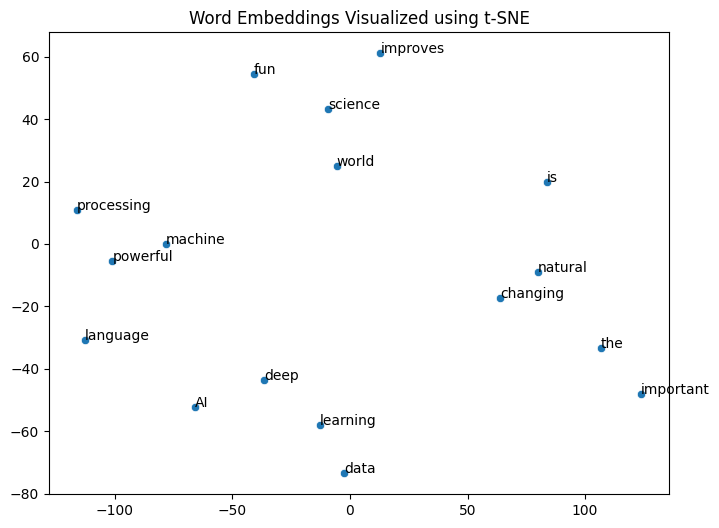

In [6]:
from gensim.models import Word2Vec
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

# Sample text corpus
sentences = [
    ["data", "science", "is", "fun"],
    ["machine", "learning", "is", "powerful"],
    ["deep", "learning", "improves", "AI"],
    ["AI", "is", "changing", "the", "world"],
    ["natural", "language", "processing", "is", "important"],
]

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=50, window=2, min_count=1, workers=4)

# Get the word vectors
word_vectors = model.wv
words = list(word_vectors.key_to_index.keys())

# Reduce dimension using t-SNE
word_embeddings = np.array([word_vectors[word] for word in words])
tsne = TSNE(n_components=2, perplexity=min(3, len(words) - 1), random_state=42)
reduced_embeddings = tsne.fit_transform(word_embeddings)

# Plot in 2D space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1])

# Annotate the sentences
for i, word in enumerate(words):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title("Word Embeddings Visualized using t-SNE")
plt.show()

## 2. Sentence embeddings using SBERT (Sentence-BERT)

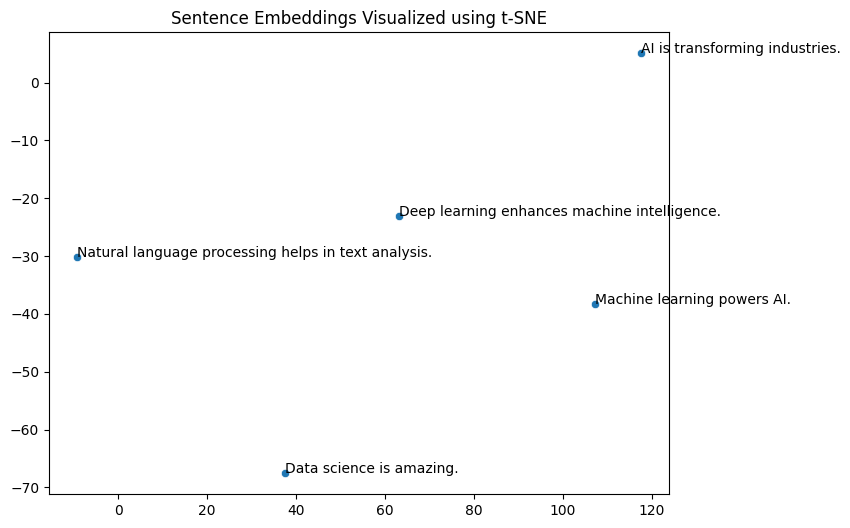

In [10]:
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import numpy as np

# Sample sentences
sentences = [
    "Data science is amazing.",
    "Machine learning powers AI.",
    "AI is transforming industries.",
    "Natural language processing helps in text analysis.",
    "Deep learning enhances machine intelligence.",
]

# Load pretrained SBERT model
sbert_model = SentenceTransformer("all-MiniLM-L6-v2")

# Generate sentence embeddings
sentence_embeddings = sbert_model.encode(sentences)

# Reduce dimension using t-SNE
tsne = TSNE(n_components=2, perplexity=min(3, len(sentences) - 1), random_state=42)
reduced_embeddings = tsne.fit_transform(sentence_embeddings)

# Plot in 2D space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1])

# Annotate the sentences
for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title("Sentence Embeddings Visualized using t-SNE")
plt.show()

## 3. Topic modeling (LDA) for semantic analysis

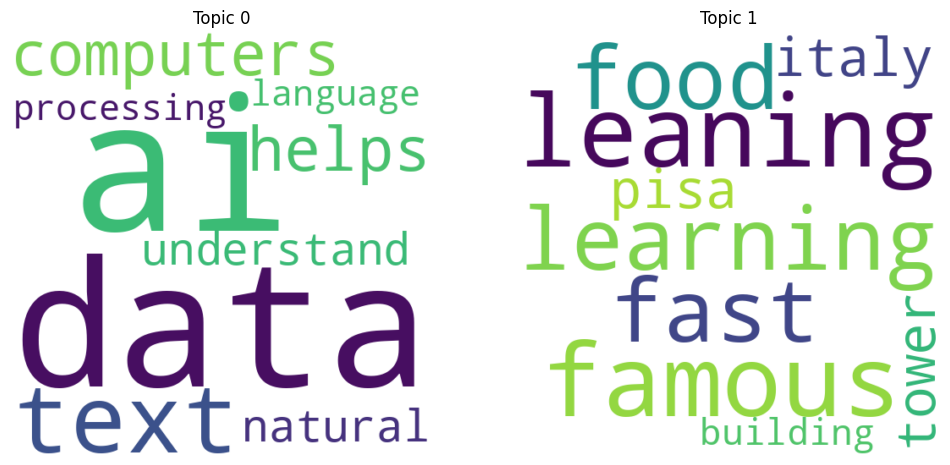

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Sample text corpus
documents = [
    "Data science and AI are revolutionizing industries.",
    "Machine learning is a subset of artificial intelligence.",
    "Natural language processing helps computers understand text.",
    "Deep learning advances AI with neural networks.",
    "Big data is essential for training AI models.",
    "Pizza is a popular fast food.",
    "Sushi is a healthy and delicious Japanese dish.",
    "Mount Fuji is the highest volcano in Japan.",
    "The Leaning Tower of Pisa is a famous leaning building in Italy.",
    "Cheeseburger is a famous American fast food.",
]

# Convert text to a bag-of-words representation
vectorizer = CountVectorizer(stop_words="english")
doc_term_matrix = vectorizer.fit_transform(documents)

# Apply LDA
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(doc_term_matrix)

# Get topic keywords
words = vectorizer.get_feature_names_out()
topic_words = {
    i: [words[idx] for idx in topic.argsort()[:-10:-1]]
    for i, topic in enumerate(lda.components_)
}

# Generate and visualize word clouds
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    wordcloud = WordCloud(width=500, height=500, background_color="white").generate(
        " ".join(topic_words[i])
    )
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(f"Topic {i}")
    ax.axis("off")

plt.show()

## What's next?

1. A real-world dataset example (news, reviews, etc.)
2. More interactive visualizations (like clustering with UMAP)